In [1]:
import os,glob
import numpy as np
import pandas as pd
import glob
import pyslha
import time
import progressbar as P
from atlas_susy_2018_13_Recast import getLLPs, getDisplacedJets
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import seaborn as sns
from scipy.special import kn,zetac
import pyslha
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

delphesDir = os.path.abspath("./DelphesLLP")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT

ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')


Welcome to JupyROOT 6.28/06


True

In [3]:
# inputFile = './pp2GoGo/Events/run_01/gluino_2000_850_tau_0.01_delphes_events.root'
inputFile = './pp2GoGo_strong/Events/run_01/strong_2000_850_tau_0.01_delphes_events.root'

In [4]:
f = ROOT.TFile(inputFile,'read')
tree = f.Get("Delphes")
nevts = tree.GetEntries()

l_dec = []
r_dec = []
beta = []
gbeta  = []
for ievt in range(nevts):    

    tree.GetEntry(ievt)
    print('nllps=',tree.llps.GetEntries())
    llpCandidates = getLLPs(tree.llps,tree.llpDaughters) 
    for llp in llpCandidates:
        print(llp.PID,llp.Status)
        continue
        l_dec.append(np.sqrt(llp.Xd**2 + llp.Yd**2 + llp.Zd**2))
        r_dec.append(np.sqrt(llp.Xd**2 + llp.Yd**2))
        beta.append(llp.beta)
        gbeta.append(llp.gbeta)
    break


nllps= 2
1000023 52
1000023 22


In [6]:
for llp in llpCandidates:
    print(llp.PID,llp.Status)
    for d in llp.directDaughters:
        print(' ',d.PID)

1000023 52
  -3
  -2
  -1
1000023 22
  1
  2
  3


In [75]:
l_dec = np.array(l_dec)
r_dec = np.array(r_dec)
beta = np.array(beta)
gbeta = np.array(gbeta)

In [76]:
l0 = l_dec/gbeta

In [80]:
bins=np.linspace(0.,50,11)

In [81]:
def fDecayedAt(l0_mm,dl0_mm,tau_ns):
    c = 3e8*1e3 # (c in mm/s)
    tau = tau_ns*1e-9 # (proper lifetime in s)
    fDec = (dl0_mm/(c*tau))*np.exp(-l0_mm/(c*tau))
    return fDec # Fraction of particles which have decayed between l0 and l0+dl0

In [82]:
dl0_mm = bins[1]-bins[0]
tau_ns = 0.1
f = np.array([fDecayedAt(l,dl0_mm,tau_ns) for l in bins])

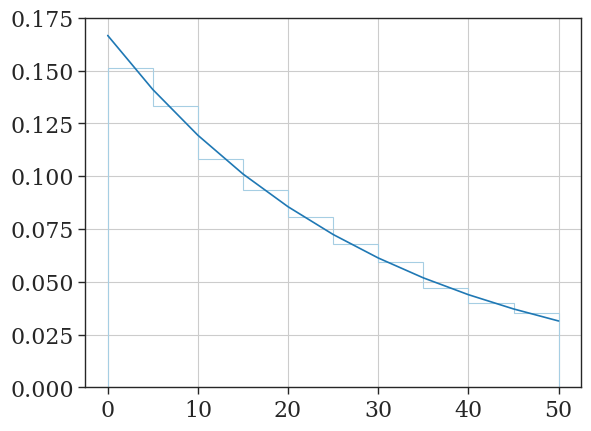

In [83]:
plt.hist(l0,bins=bins,density=False,histtype='step',weights=[1./len(l0)]*len(l0))
plt.plot(bins,f)
plt.grid()
plt.show()


In [52]:
gb_mean = np.mean(gbeta)
print(gb_mean)

0.621316422845395


In [53]:
Rmin = 4.0
c = 3e8*1e3 # (c in mm/s)
tau = tau_ns*1e-9 # (proper lifetime in s)
np.exp(-Rmin/(gb_mean*c*tau))

0.11695323174516004

In [54]:
len([l for l in l_dec if l > 4.0])/len(l_dec)

0.12082249349609765

In [57]:
len([l for l in r_dec if l > 4.0])/len(r_dec)

0.051280768461076646

In [59]:
print(len(r_dec))

19988


In [85]:
1-(1.-0.05)**2

0.09750000000000003